In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
from scipy import stats
import pickle
import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (15,10)
plt.style.use('seaborn')

In [3]:
# open the file of interest, and use pickle loading
infile = open ("qcd_100000_pt_1000_1200.pkl",'rb')
background_dict = pickle.load(infile)

# open the file of interest, and use pickle loading
infile = open ("higgs_100000_pt_1000_1200.pkl",'rb')
signal_dict = pickle.load(infile)

# list all keys of the files
keys = background_dict.keys()

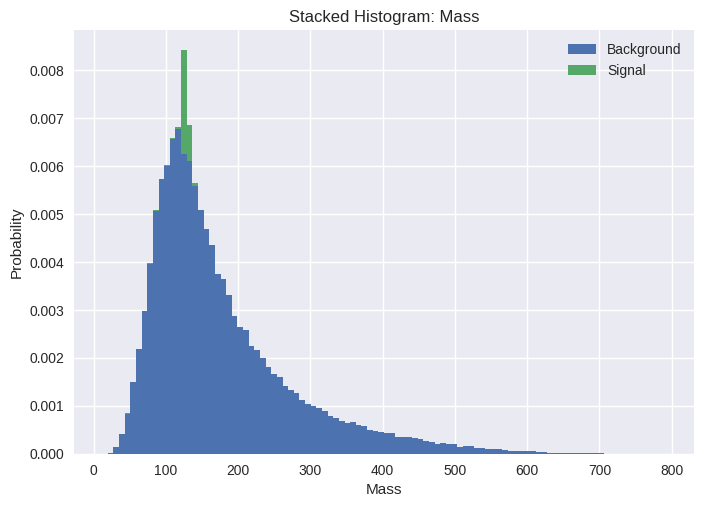

In [185]:
fig, ax = plt.subplots(1,1)

bkg_mass = background_dict['mass']
sig_mass = signal_dict['mass']

data = [bkg_mass, sig_mass]

bkg_weight = np.array([2000]*len(bkg_mass))
sig_weight = np.array([50]*len(sig_mass))

a = ax.hist(data, bins=100, density=True, stacked=True, weights=[bkg_weight, sig_weight], label=["Background", "Signal"])

ax.set_xlabel("Mass")
ax.set_ylabel("Probability")
ax.set_title("Stacked Histogram: Mass")

plt.legend(loc=0)
plt.show()

In [156]:
expected_sig = stats.poisson.cdf(2050, 2000, loc=0)
expected_sig

0.8703871254450806

In [157]:
n_higgs = 50
n_qcd = 2000

sig = n_higgs / np.sqrt(n_qcd)
sig

1.118033988749895

### Cuts to optimize expected significance

In [286]:
bins = 100
bkd_hist = ax.hist(bkg_mass, bins, range=[0,round(a[1][-1])], weights=bkg_weight / 100000)
sig_hist = ax.hist(sig_mass, bins, range=[0,round(a[1][-1])], weights=sig_weight / 100000)

In [281]:
expected_sig = []
for i in range(bins):
    qcd = bkd_hist[0][i] 
    higgs = sig_hist[0][i] 
    prob = stats.poisson.cdf(qcd+higgs, qcd, loc=0)
    expected_sig.append(stats.norm.ppf(prob, loc=0, scale=1))
    

expected_sig = np.array(expected_sig)
expected_sig[np.isinf(expected_sig)] = 0

In [292]:
index = np.where(expected_sig == np.max(expected_sig))[0][0]
bkd_hist[1][index]

126.72

In [294]:
expected_sig[index]

2.3169571858644566

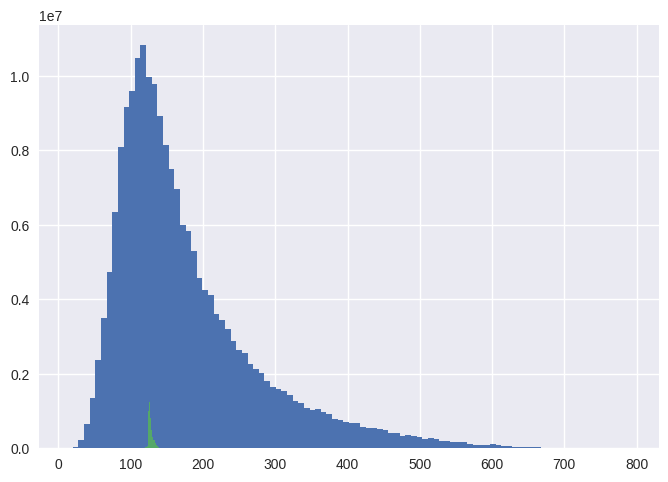

In [183]:
fig, ax = plt.subplots(1,1)


bkg_weight = np.array([2000]*len(bkg_mass))
sig_weight = np.array([50]*len(sig_mass))

b = ax.hist(bkg_mass, bins=100, weights=bkg_weight)
s = ax.hist(sig_mass, bins=100, weights=sig_weight)